In [80]:
library(tidyverse)
load("bil.RData")
bil$log_worth <- log10(bil$`worth in billions`)
bil$age <- ifelse(bil$age == -1, NA, bil$age)

# Lecture 07: Covariation

In this notebook, we will cover the following cases for studying the **covariation** between two variables:

* [A categorical and continuous variable](#A-categorical-and-continuous-variable)
* [Two categorical variables](#Two-categorical-variables)
* [Two continuous variables](#Two-continuous-variables)

## A categorical and continuous variable
To visualize the joint distribution of a continuous and categorical variable, it is most effective to use `group=`, `color=`, `fill=`, and or `facet_*()` to plot the distribution of the continuous variable for each level of the categorical variable.

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable.

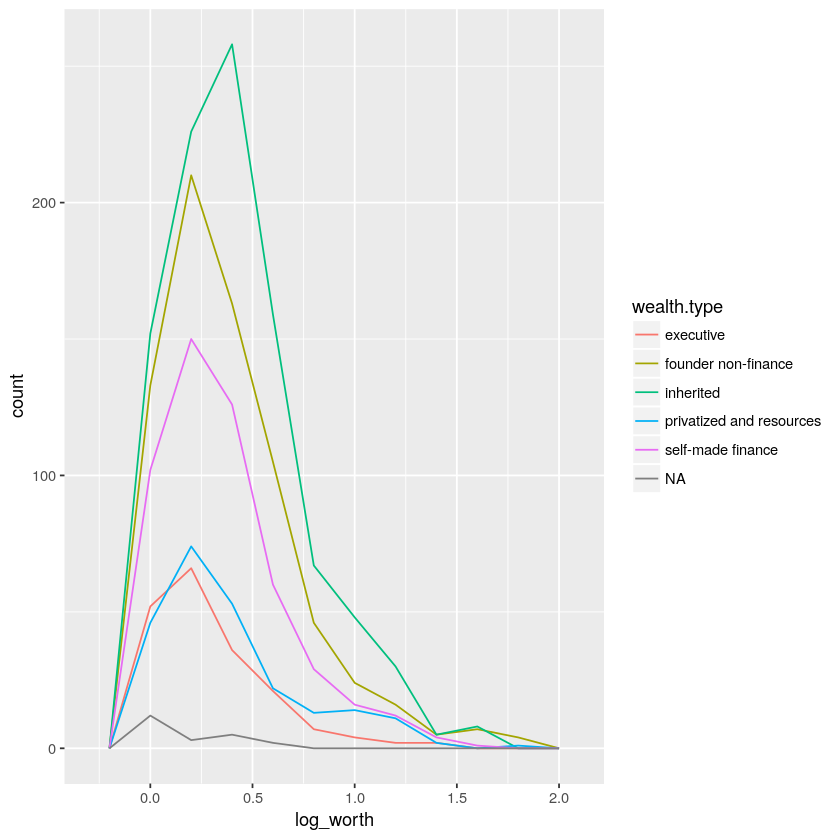

In [49]:
ggplot(data = bil, mapping = aes(x = log_worth)) + 
       geom_freqpoly(mapping = aes(colour = wealth.type), binwidth = .2)

It's hard to compare distributions here because they are not normalized to integrate to one. In other words, the number of different wealth types in the data varies widely:

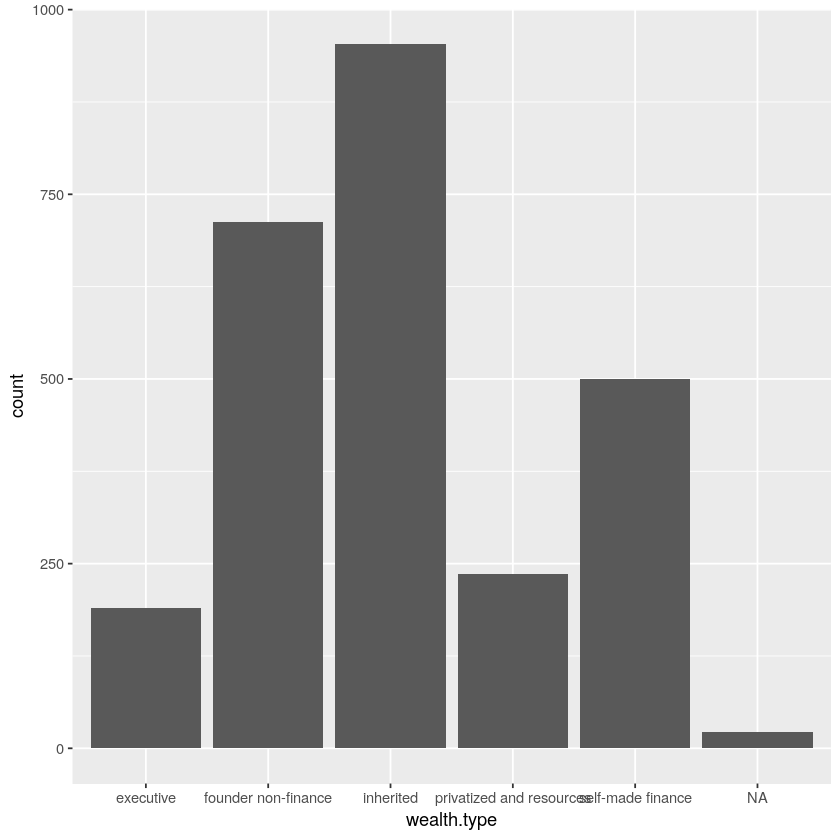

In [41]:
ggplot(bil) + geom_bar(mapping = aes(x = wealth.type))

To remedy this we can use the tell ggplot to plot the (estimated) *density* of each random variable rather than the count:

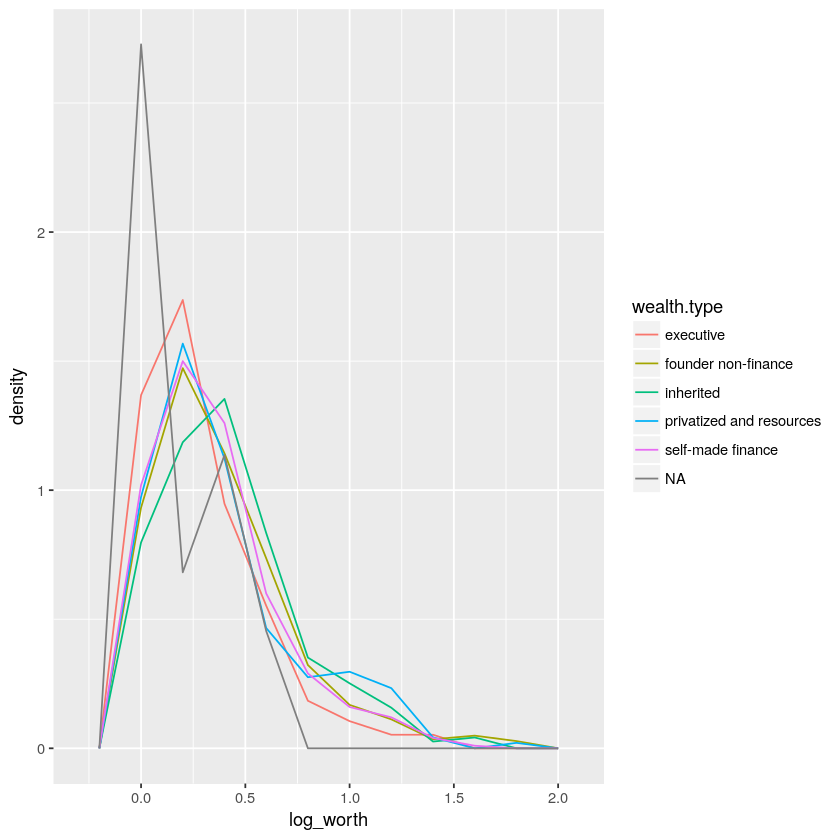

In [54]:
ggplot(data = bil, mapping = aes(x = log_worth, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = wealth.type), binwidth = .2)

Note the difference: we have passed the special argument `y = ..density..` to the aesthetic. (The default is `y = ..count..`). 

The "double dots" notation (`y = ..<something>..`) is special to ggplot. You won't encounter it elsewhere.

Even if the data are on the same scale, the default plot may not do a good job of conveying information about covariation. Consider:

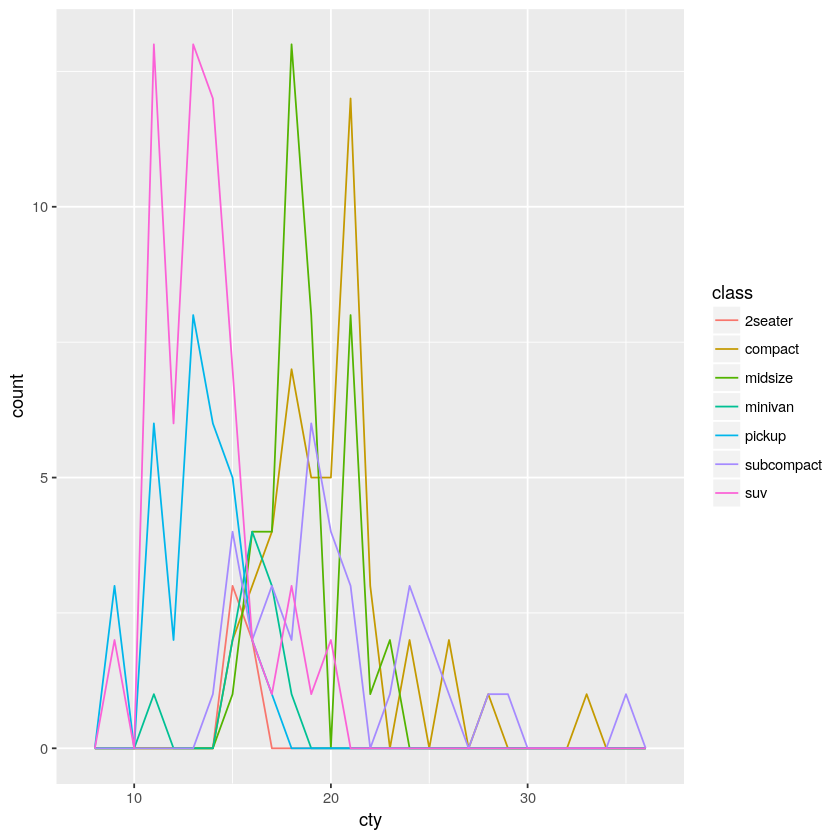

In [43]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, color = class), binwidth = 1)

Different color?

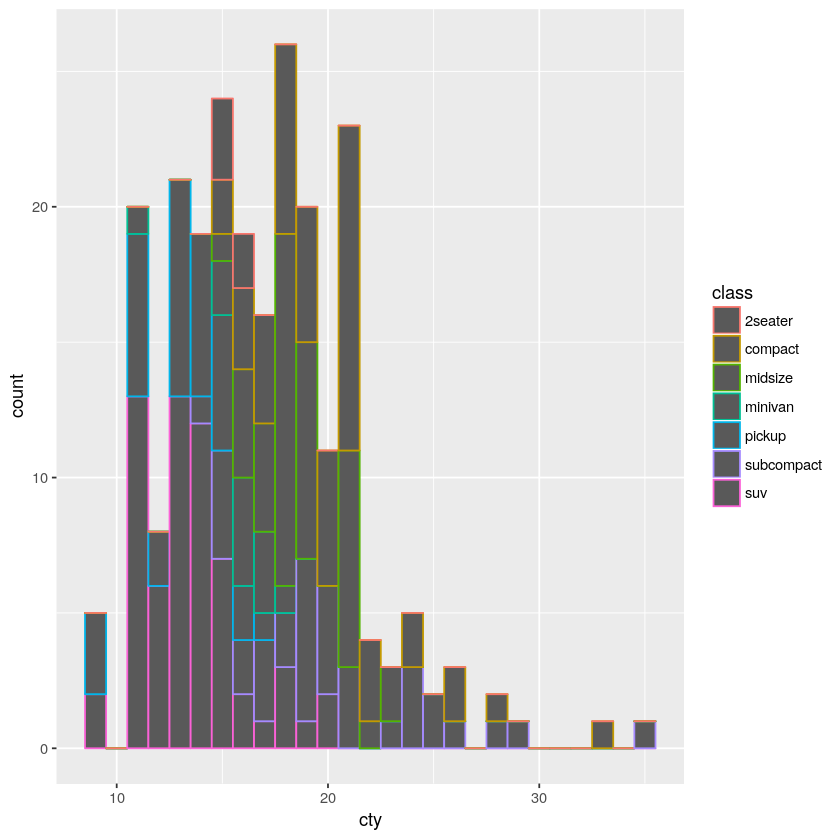

In [6]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, color = class), binwidth = 1)

Different fill?

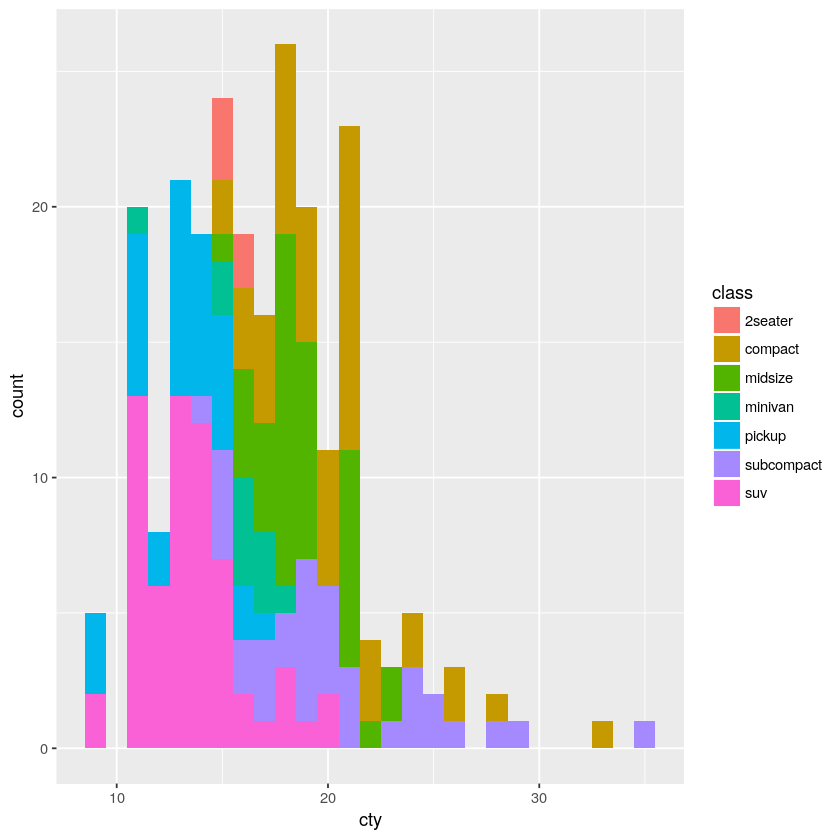

In [7]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

None of the above three plots are especially useful, in my opinion. They are too hard to interpret. If you want to see histograms, a better choice could be one of the `facet_*()` commands:

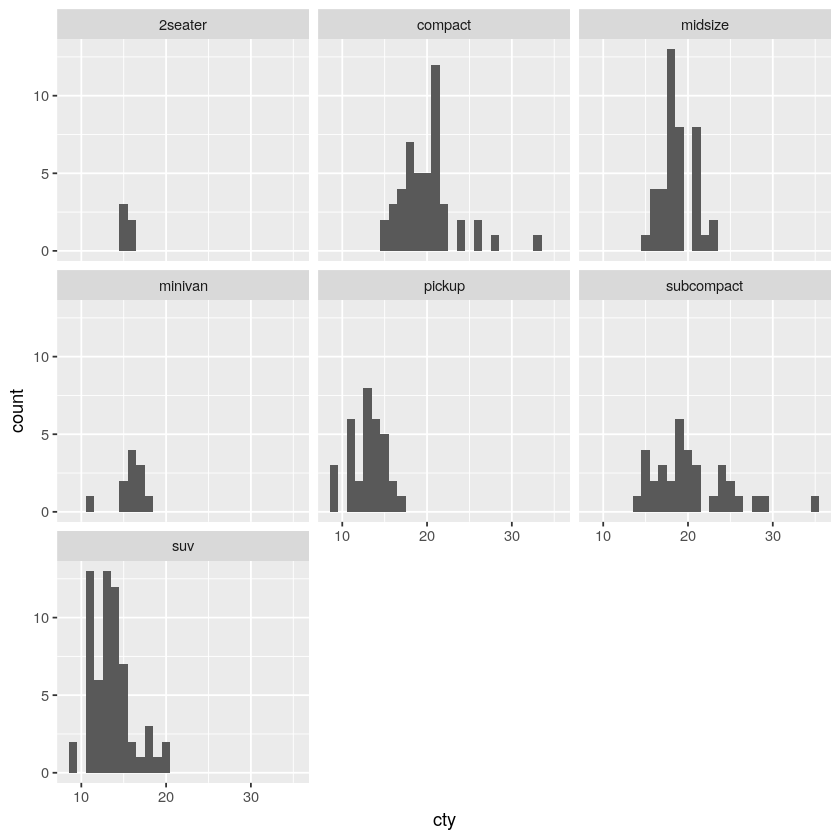

In [8]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) + facet_wrap(~ class)

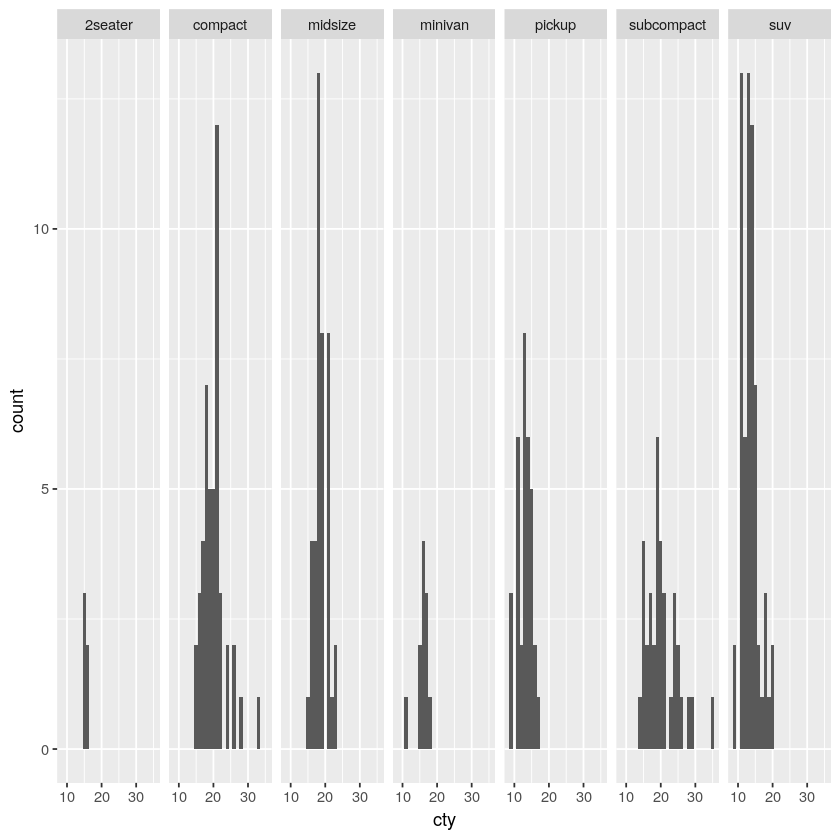

In [9]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) + facet_grid(~ class)

### Boxplots
Another thing we can do with a categorical, continuous pair is to use a **boxplot**. The way to interpret a boxplot is as a histogram turned on its side:

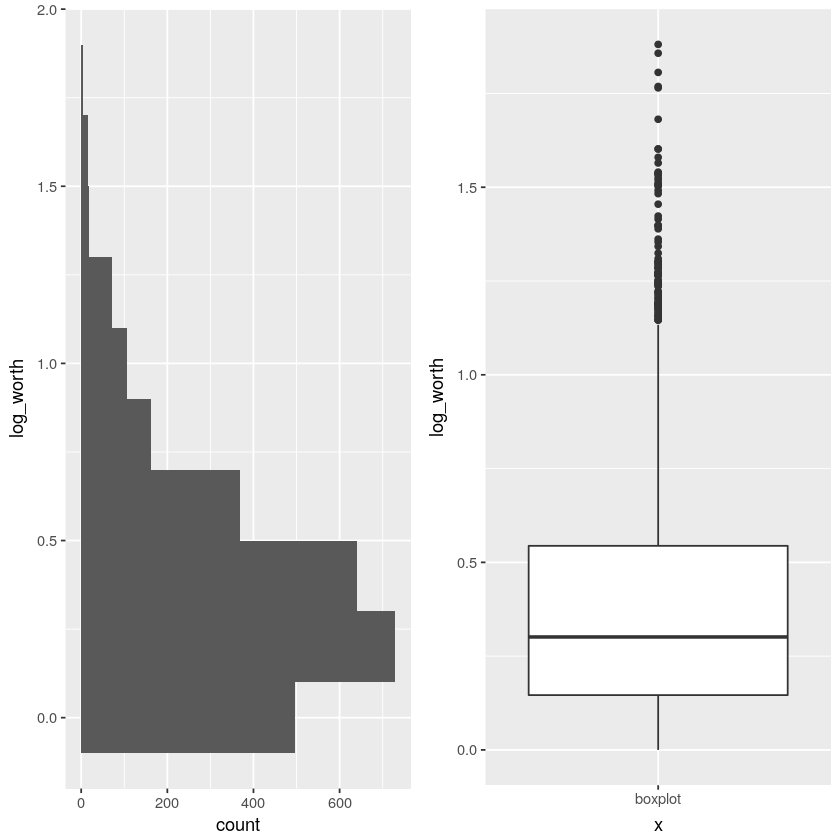

In [58]:
library(gridExtra)
p = ggplot(bil)
p1 = p + geom_histogram(aes(x=log_worth), binwidth=.2) + coord_flip()
p2 = p + geom_boxplot(aes(x='boxplot', y=log_worth))
grid.arrange(p1, p2, ncol=2)

* The black line is the median.
* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

Let's consider the distribution of `log_worth` across different regions:

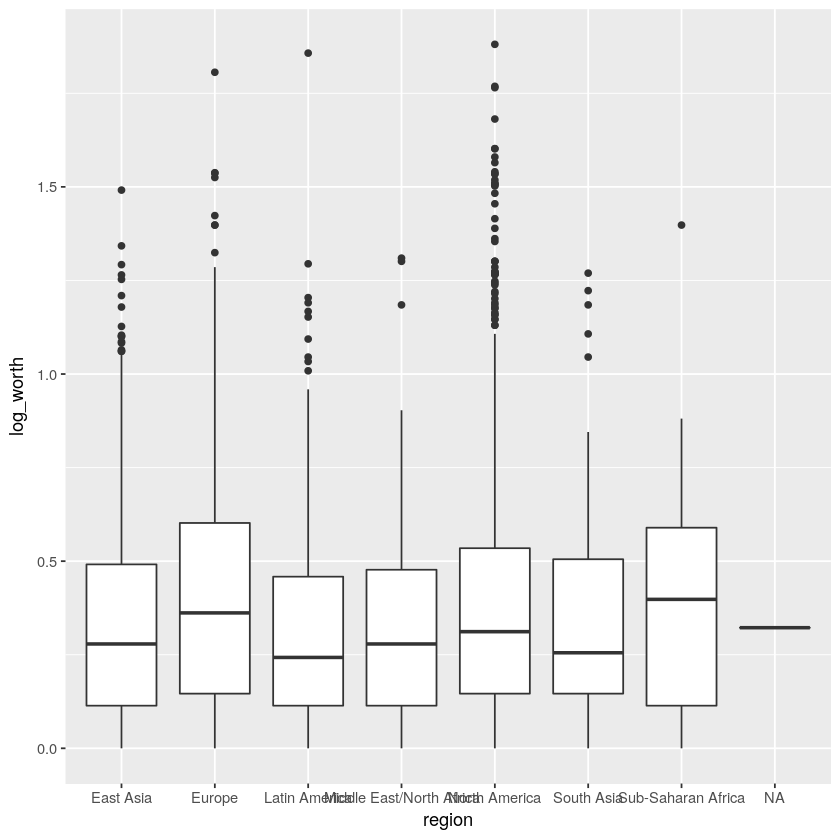

In [68]:
ggplot(data = bil) + 
    geom_boxplot(mapping = aes(x = region, y = log_worth))

To replot with `region` values listed in order of the median value for `log_worth`, we can use the `fct_reorder()` function.

```
fct_reorder(categorical_var, continuous_var, FUN)
```

reorders the levels of the categorical variable `categorical_var` according the continuous variable `continuous_var`. The function `median()` is applied the the `continuous_var` values corresponding to a fixed level of `categorical_var`. Default value of the `FUN` argument is `mean`.

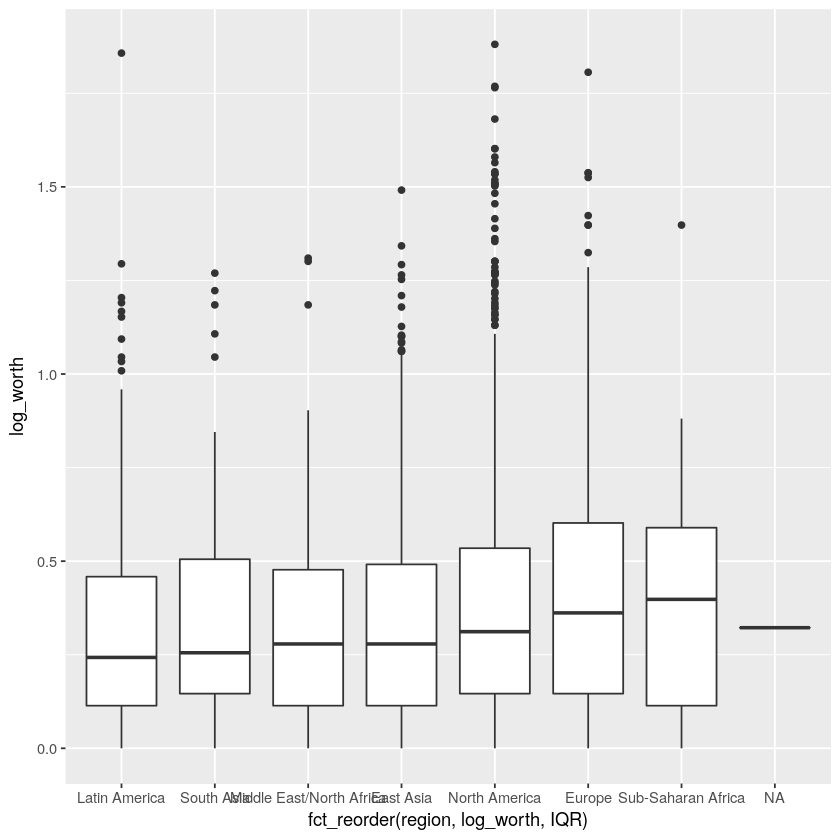

In [69]:
ggplot(data = bil) + 
    geom_boxplot(mapping = aes(x = fct_reorder(region, log_worth, IQR), y = log_worth))

If the categorical level names are long, it makes sense to flip the axes:

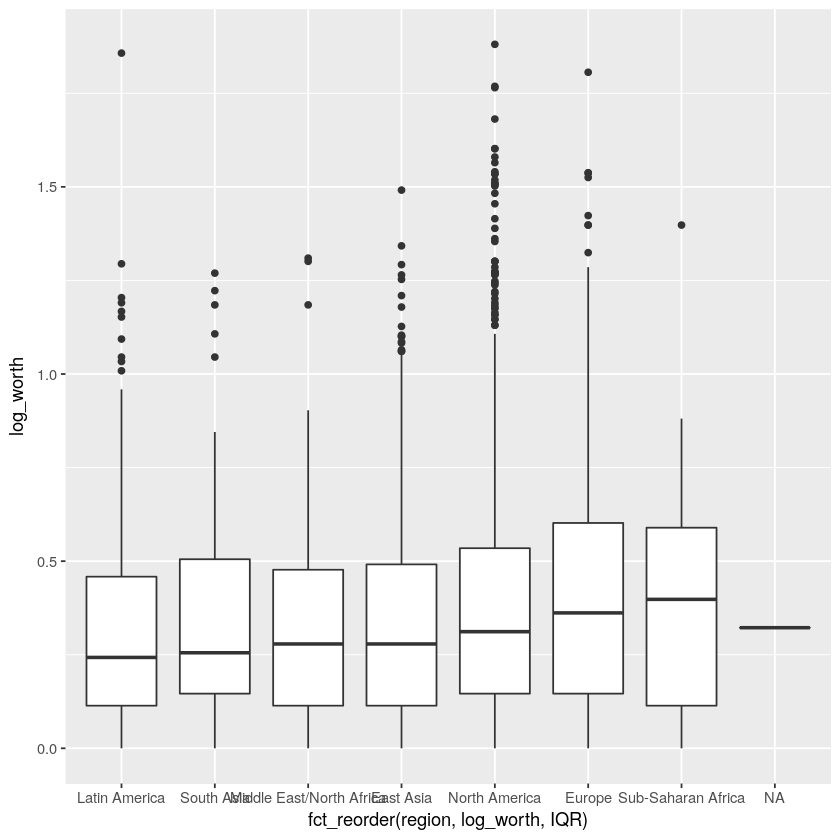

In [70]:
ggplot(data = bil) + 
    geom_boxplot(mapping = aes(x = fct_reorder(region, log_worth, IQR), y = log_worth))

### Violin plots
A final type of distribution plot you might encounter is the violin plot:

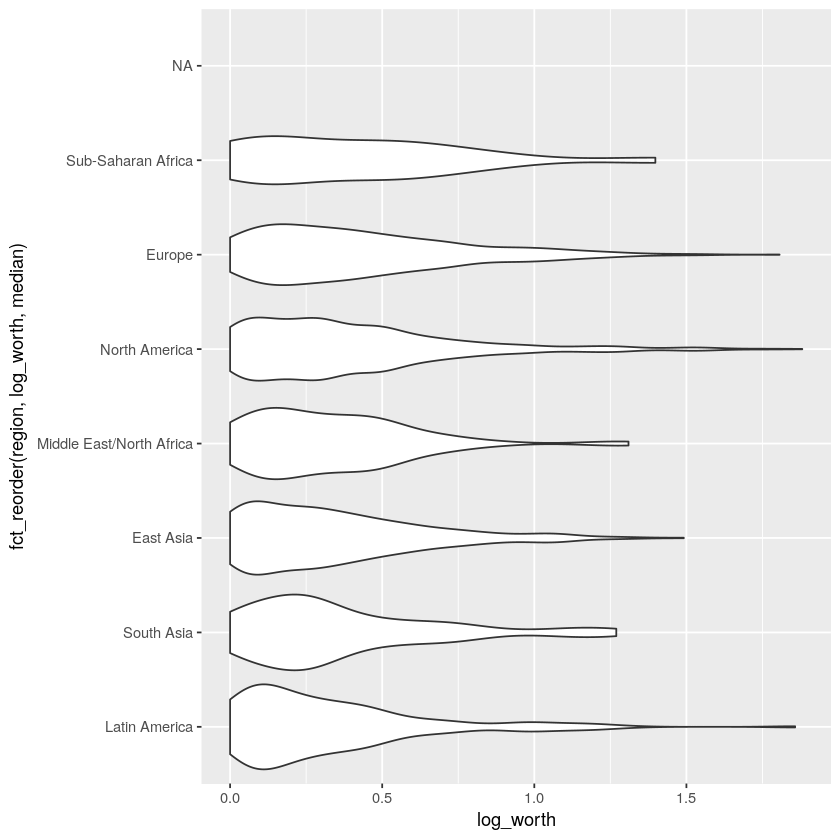

In [73]:
ggplot(data = bil) + 
    geom_violin(mapping = aes(x = fct_reorder(region, log_worth, median), y = log_worth)) +
    coord_flip()

A violin plot is a combination of box plot and density plot. Compare:

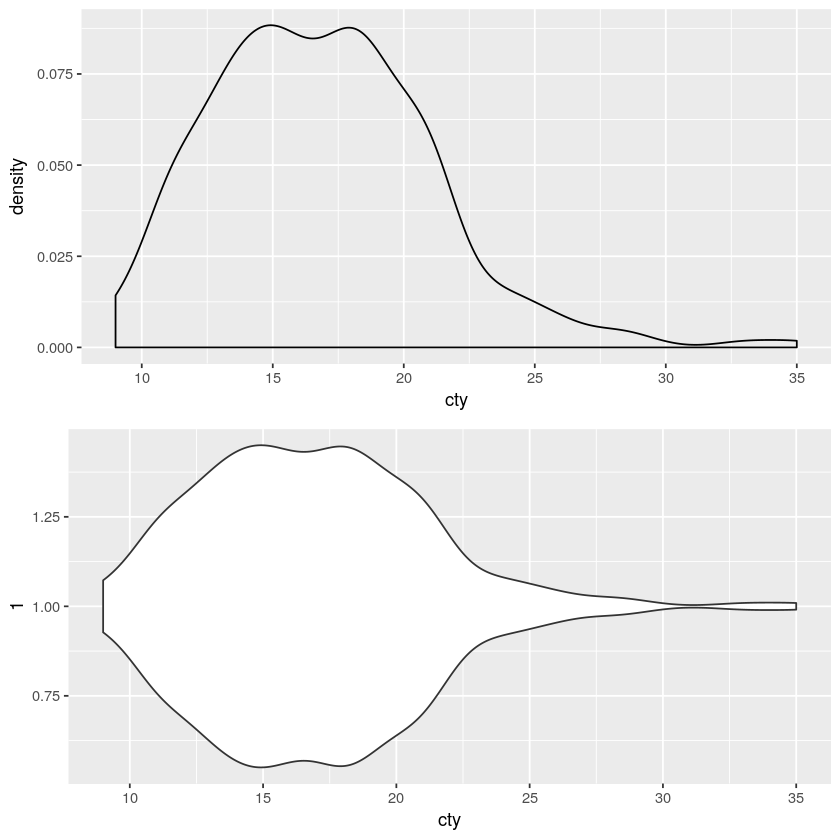

In [15]:
p1 = ggplot(mpg) + geom_density(aes(x=cty))
p2 = ggplot(mpg) + geom_violin(aes(x=1, y=cty)) + coord_flip()
grid.arrange(p1, p2, nrow=2)

## Two categorical variables
`geom_count` can be used to visualize two categorical variables.

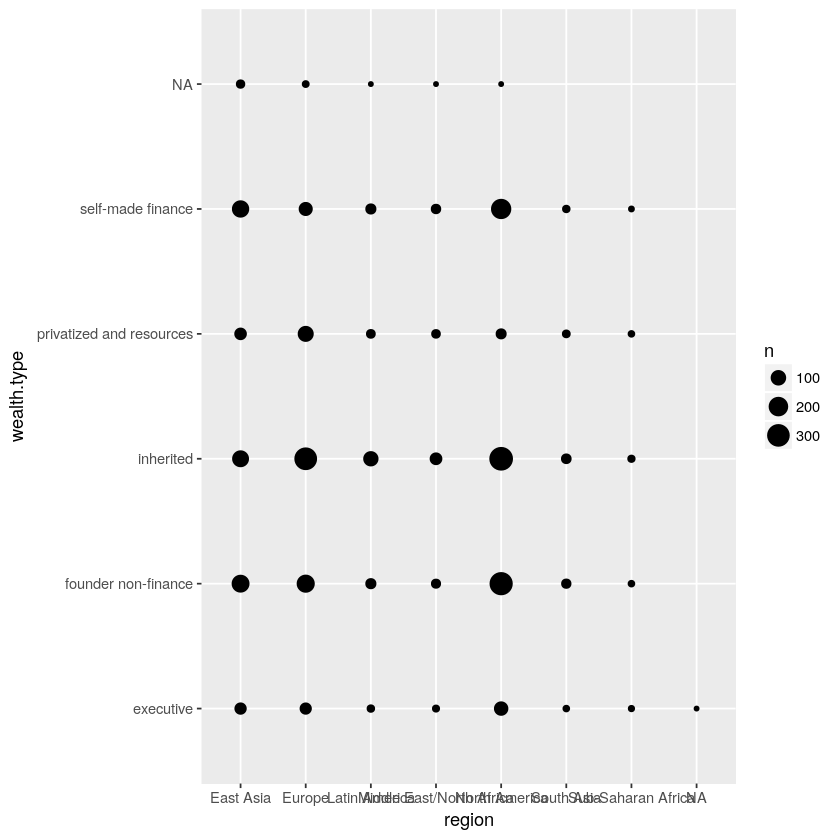

In [74]:
ggplot(data = bil) +
  geom_count(mapping = aes(x = region, y = wealth.type))

We can compute these numbers using `count()`.

In [75]:
bil %>% count(region, wealth.type) %>% print

# A tibble: 41 x 3
   region    wealth.type                  n
   <chr>     <chr>                    <int>
 1 East Asia executive                   45
 2 East Asia founder non-finance        155
 3 East Asia inherited                  131
 4 East Asia privatized and resources    49
 5 East Asia self-made finance          141
 6 East Asia <NA>                        14
 7 Europe    executive                   44
 8 Europe    founder non-finance        161
 9 Europe    inherited                  304
10 Europe    privatized and resources   111
# ... with 31 more rows


These counts can be fed to other geometries.

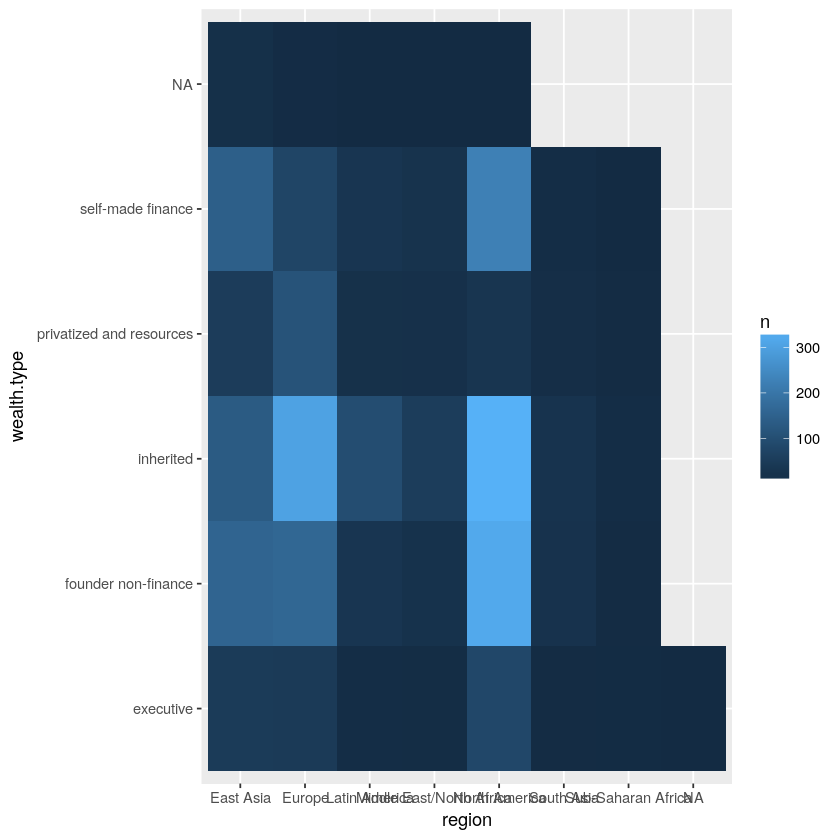

In [76]:
bil %>%
    count(region, wealth.type) %>%
    ggplot() +
        geom_tile(mapping = aes(x = region, y = wealth.type, fill = n))

## Two continuous variables
We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.

Warning message:
“Removed 385 rows containing missing values (geom_point).”

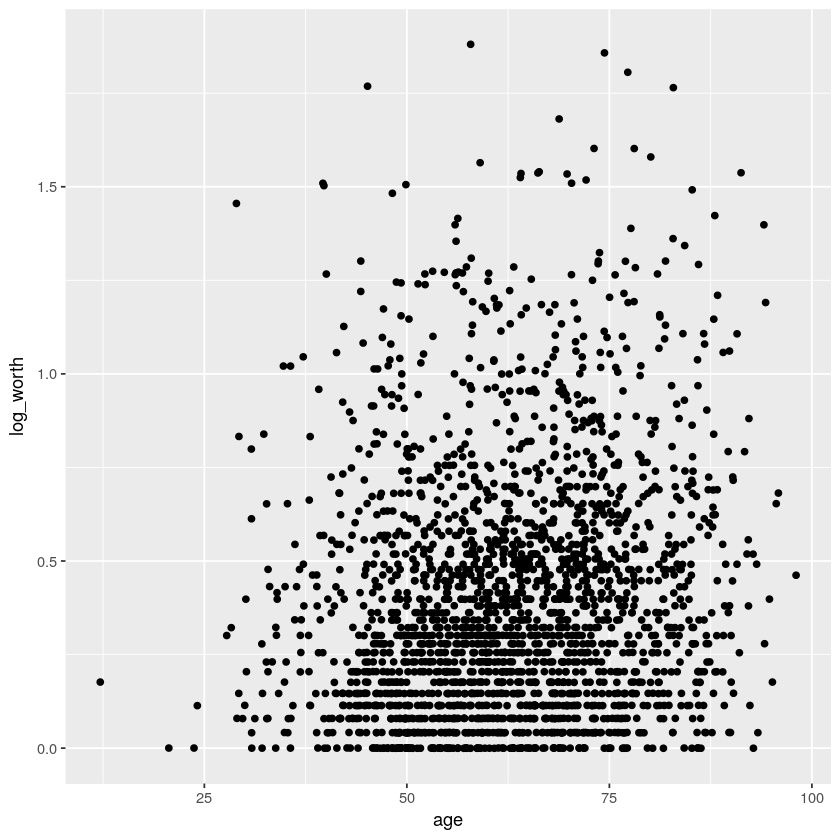

In [82]:
ggplot(data = bil) +
    geom_jitter(mapping = aes(x = age, log_worth))

`geom_point()` is not really useful for large datasets. Overplotting is a problem; additionally, it takes the computer a long time to plot thousands of points!

As an alternative to `geom_point()` we can use one of the geoms that automatically bins the data, like `geom_bin2d` or `geom_hex`.

Warning message:
“Removed 385 rows containing non-finite values (stat_bin2d).”

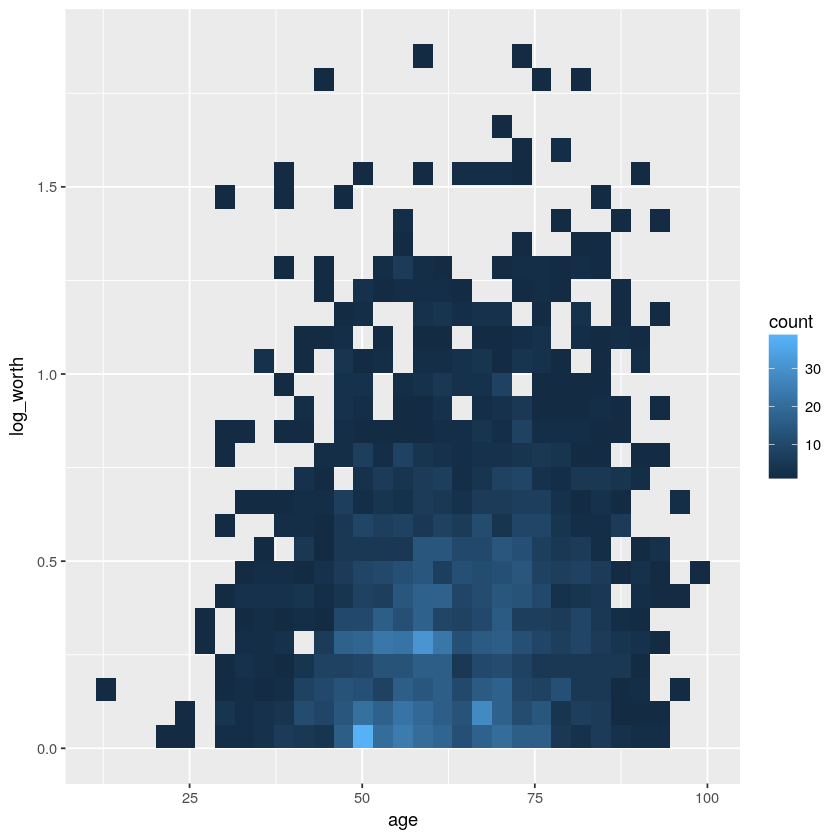

In [83]:
ggplot(data = bil) +
    geom_bin2d(mapping = aes(x = age, y = log_worth))

Warning message:
“Removed 385 rows containing non-finite values (stat_binhex).”

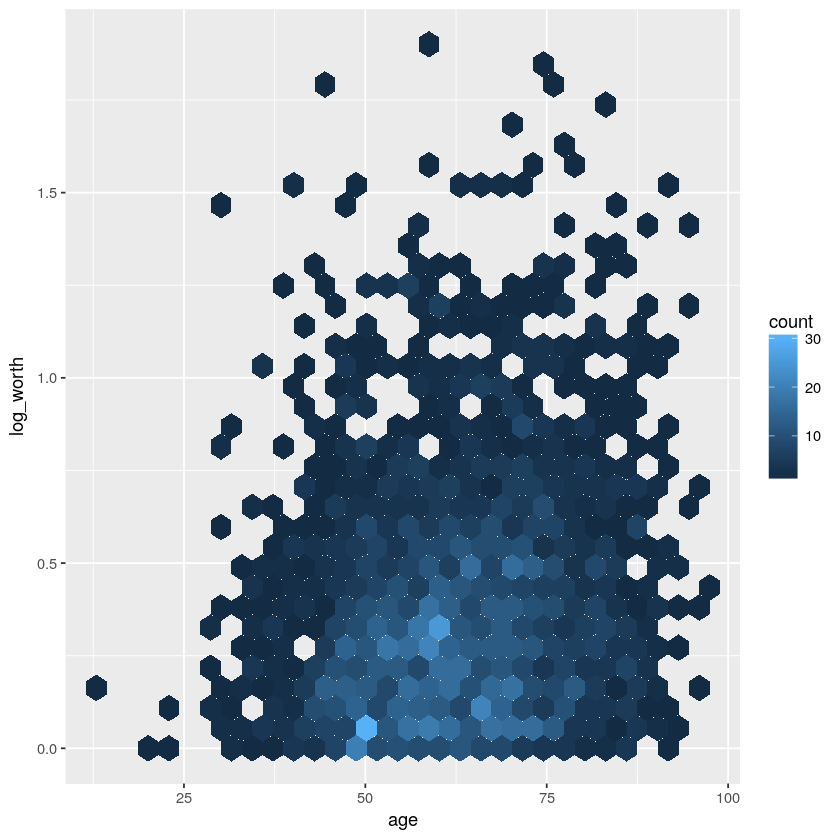

In [84]:
ggplot(data = bil) +
    geom_hex(mapping = aes(x = age, y = log_worth))

### Contour plots

A *contour plot* can be used to visualize the density of a pair of continuous random variables. The idea is to estimate their joint density (which is a three-dimensional surface) and then project it into the plane. The contours denote paths of equal height on the density, just like on a map.

Warning message:
“Removed 385 rows containing non-finite values (stat_density2d).”

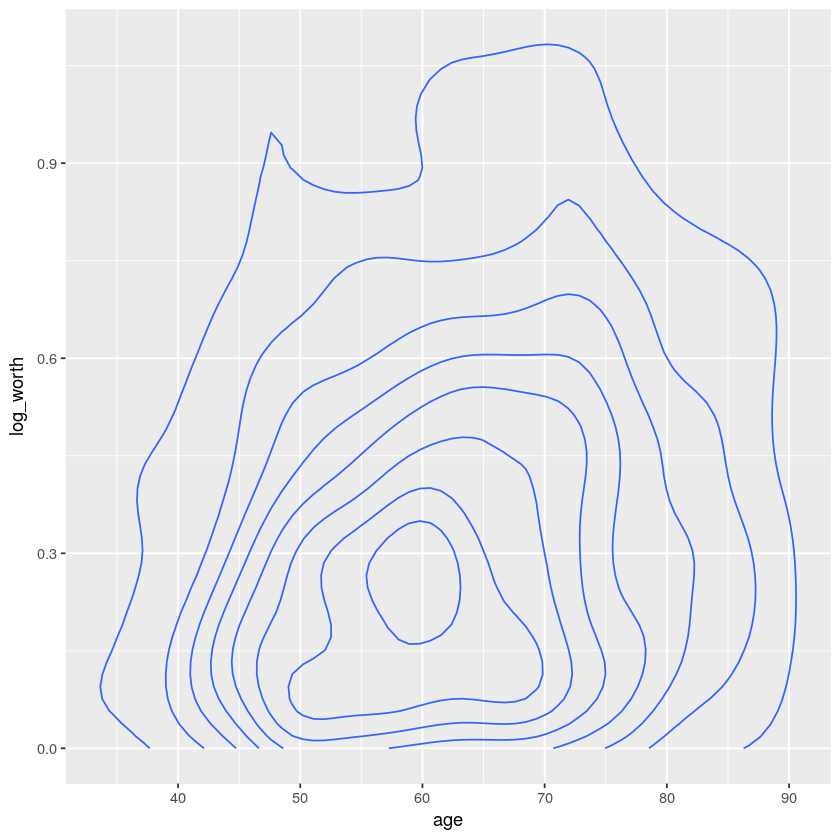

In [85]:
ggplot(bil) + geom_density_2d(aes(x=age, y=log_worth))

We can color the lines but level for more visual impact, and also choose the amount of smoothing by specifying `binwidth`:

Warning message:
“Removed 385 rows containing non-finite values (stat_density2d).”

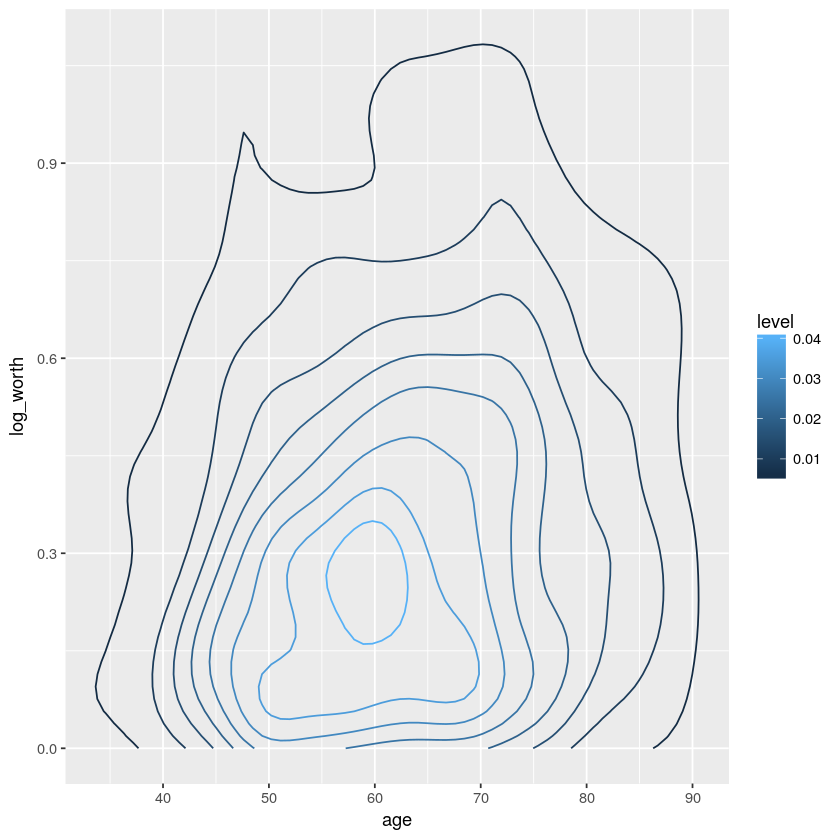

In [90]:
ggplot(bil) + geom_density_2d(aes(x=age, y=log_worth, color=..level..))

Another option is to bin one continuous variable so it becomes categorical variable, then use one of the techniques for visualising the combination of a categorical and a continuous variable. We saw an example of this last lecture using `cut_width`:

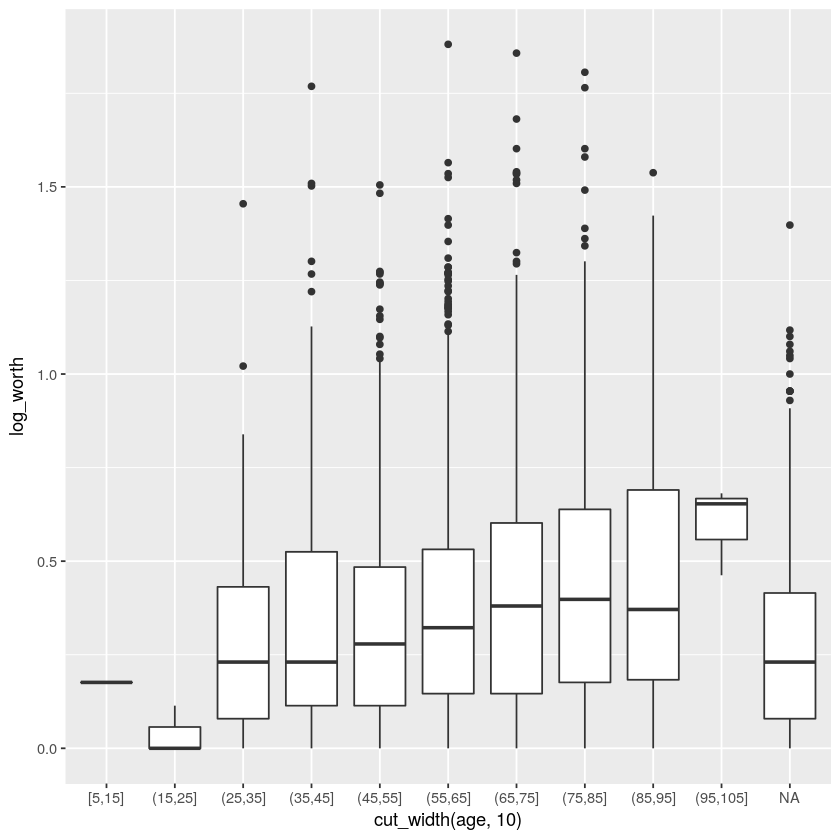

In [91]:
ggplot(bil) + geom_boxplot(aes(x=cut_width(age, 10), y=log_worth))

I like this technique as a way to cut down on clutter.

This cuts age so that it falls into a bin of width 10 years. It has the disadvantage that certain bins (in particular get far more observations than the rest. A related command `cut_number` will select bins so that each has a constant number of observations:

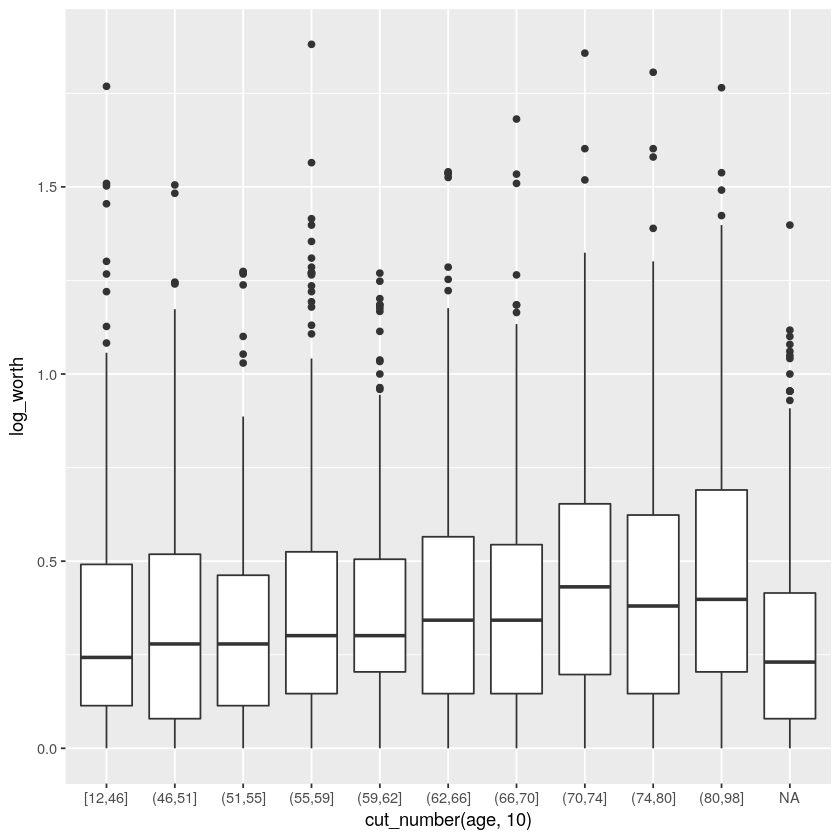

In [92]:
ggplot(bil) + geom_boxplot(aes(x=cut_number(age, 10), y=log_worth))

We can combine `cut_number` with `fct_reorder` to get a sorted plot:

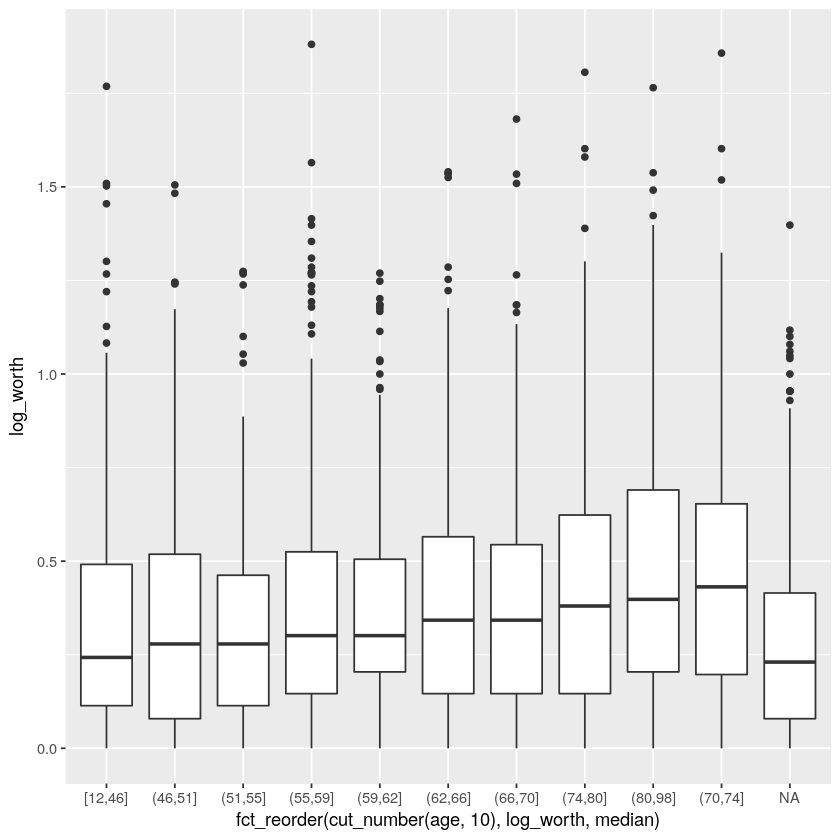

In [93]:
ggplot(bil) + geom_boxplot(aes(x=fct_reorder(cut_number(age, 10), log_worth, median), y=log_worth))

Is this appropriate? In this case probably not. The $x$ axis already had a natural ordering.

The $y$-axis of this plot is squished on the left-hand side. To mitigate this we can try plotting on a log scale:

## Modeling and residuals

Our goal when studying covariation is to try and find relationships that explain the data. For example, consider the following plots of the relationship between price, cut and carat:

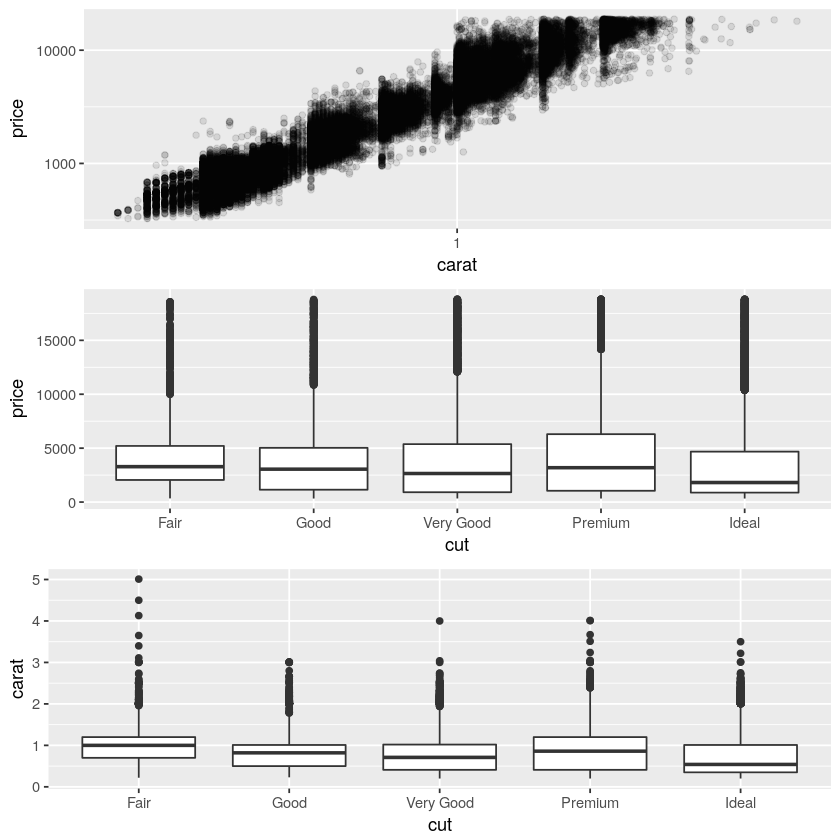

In [96]:
library(gridExtra)
g = ggplot(diamonds)
p1 = g + geom_point(aes(x=carat, y=price), alpha=.1) + scale_x_log10() + scale_y_log10()
p2 = g + geom_boxplot(aes(x=cut, y=price))
p3 = g + geom_boxplot(aes(x=cut, y=carat))
grid.arrange(p1, p2, p3, nrow=3)

These plots tell us that `log(price)` and `log(carat)` have nearly a linear relationship, and that cut and carat are also related to price and to each other. In particular, high quality cuts seem to be lighter, and therefore have a lower price. This is counterintuitive, since of course we expect higher quality diamonds to cost more. You might wonder what is the effect of the cut after controlling for the effect of weight (carat) on price?

In [29]:
library(modelr)

mod <- lm(log(price) ~ log(carat), data = diamonds)

diamonds2 <- diamonds %>% 
  add_residuals(mod) %>% 
  mutate(resid = exp(resid))

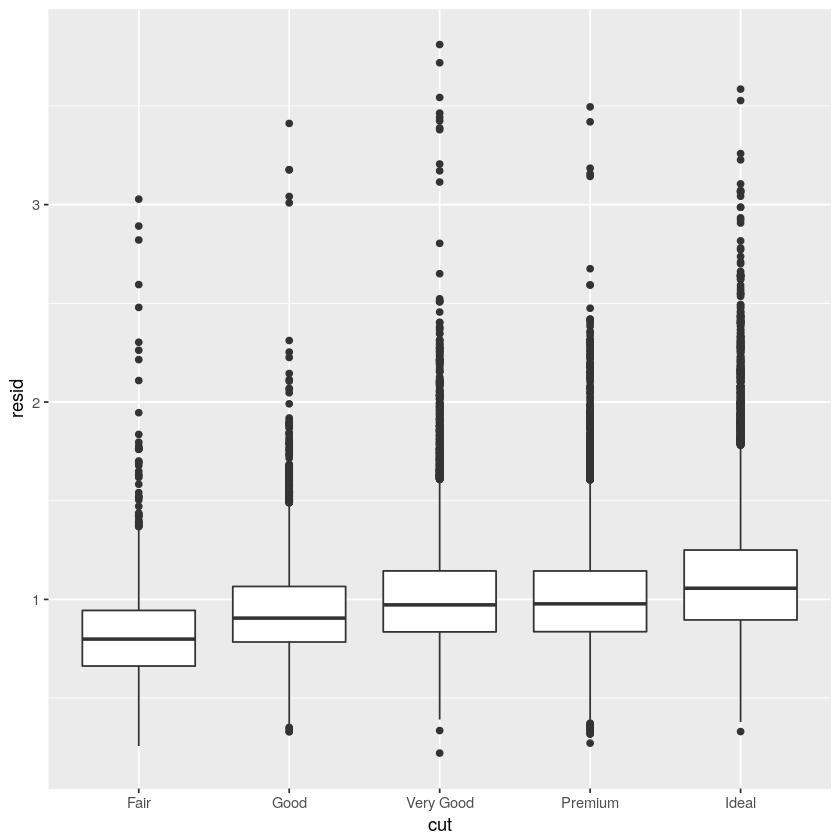

In [30]:
ggplot(data = diamonds2) + 
  geom_boxplot(mapping = aes(x = cut, y = resid))

We see that, after removing the "weight effect", it is indeed the case that better cuts end up costing more. 

We will study this type of analysis in more detail when we arrive at the modeling portion of R4DS later in the semester.